<a href="https://colab.research.google.com/github/shzzd/term_deposit_prediction/blob/main/Bank_additional/Bank_additional_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 350 kB/s 


In [2]:
# Calculation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from pandas import DataFrame

#One Hot encoder
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# Data balancing pipeline (SMOTE and Under Sampling)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Train test split and Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

# Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# Time
from time import time

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
le = LabelEncoder()

# Load data

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

**Dataset is Imbalanced**

## Check how data is distributed

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


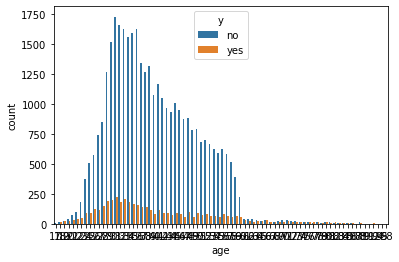

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


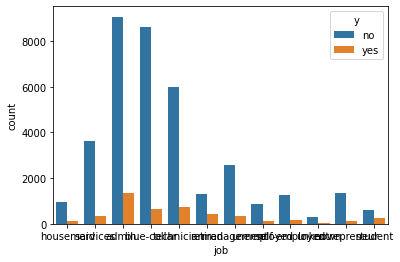

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


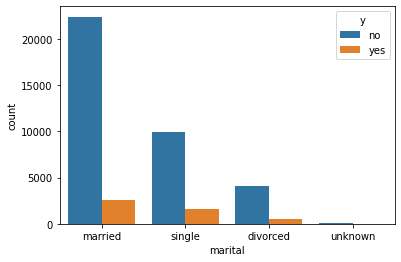

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


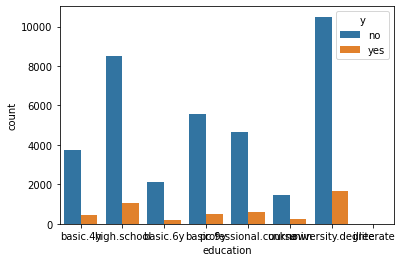

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


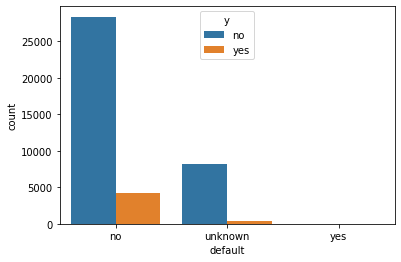

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


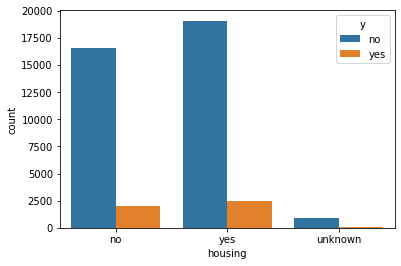

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


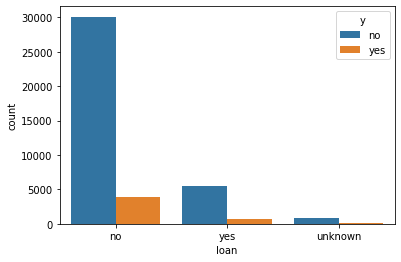

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


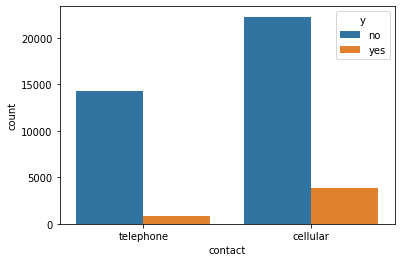

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


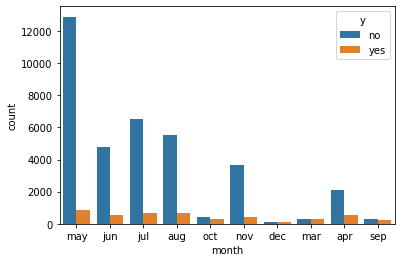

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


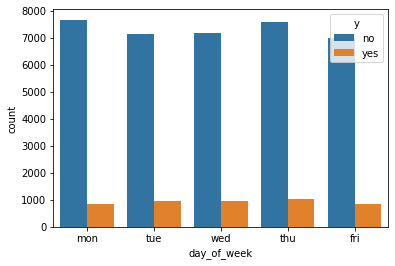

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


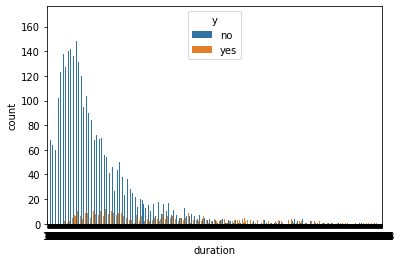

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


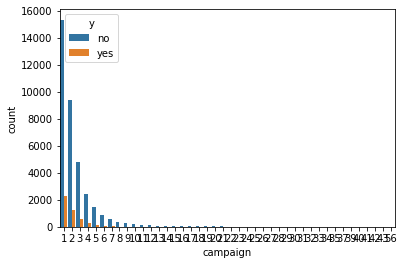

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


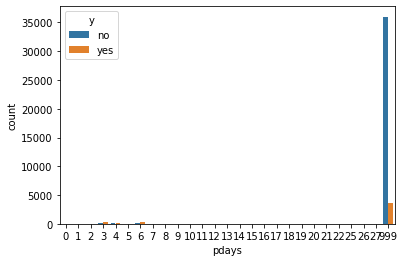

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


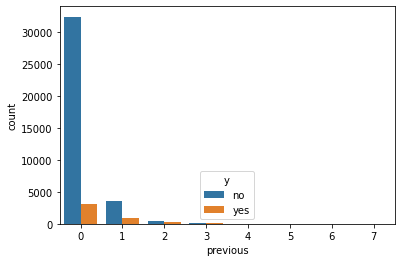

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


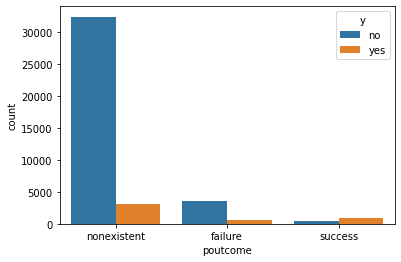

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


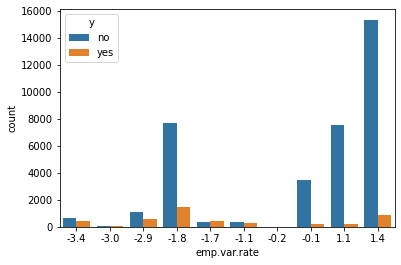

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


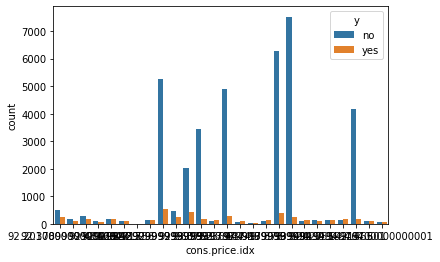

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


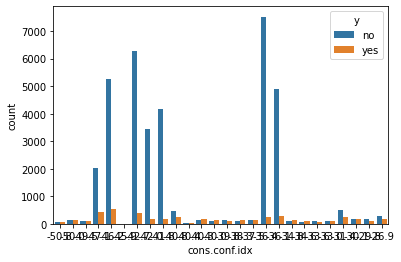

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


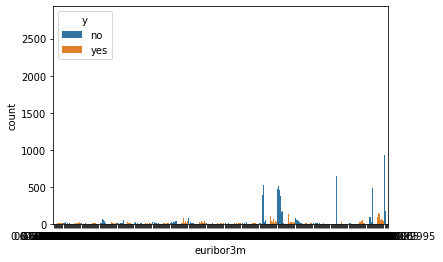

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


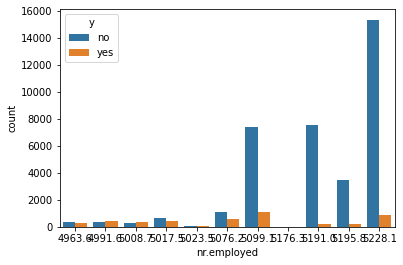

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


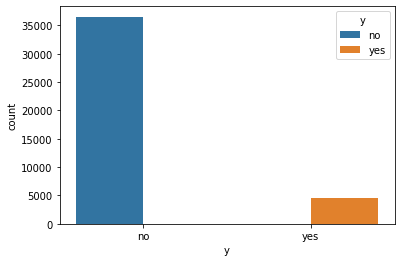

In [ ]:
for i in df:
  sns.countplot(df[i], hue=df.y)
  plt.show()

## Check the outliers

In [ ]:
df_eda = df.copy()
for i in df_eda.columns:
  if df_eda[i].dtype in ['bool', 'object']:
    df_eda[i] = le.fit_transform(df_eda[i])

In [ ]:
df_eda.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


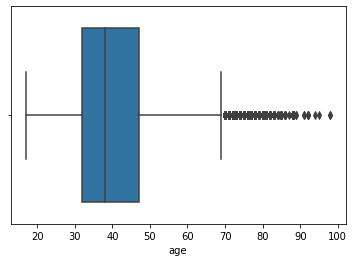

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


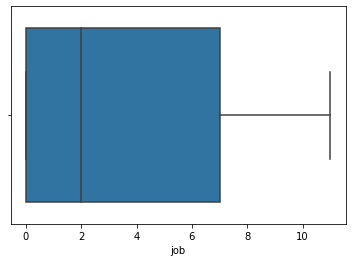

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


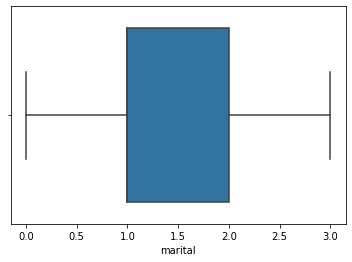

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


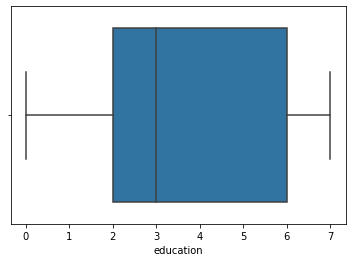

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


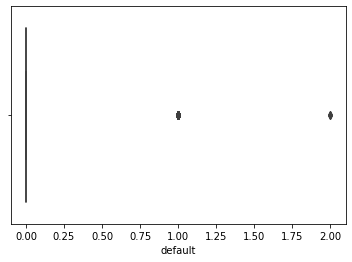

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


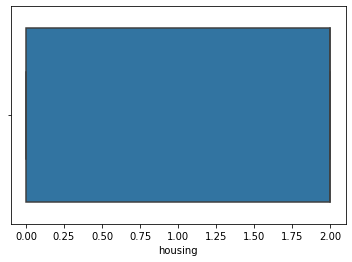

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


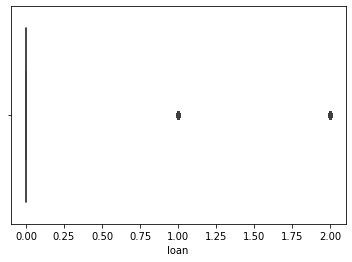

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


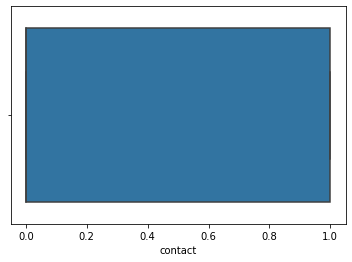

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


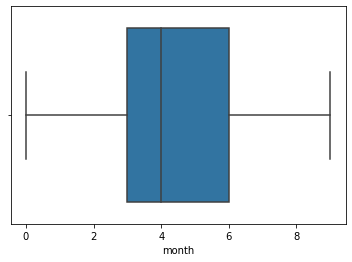

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


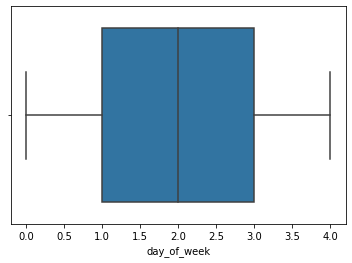

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


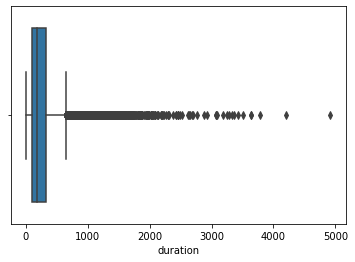

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


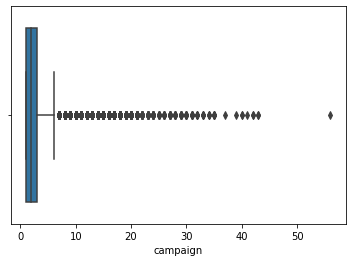

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


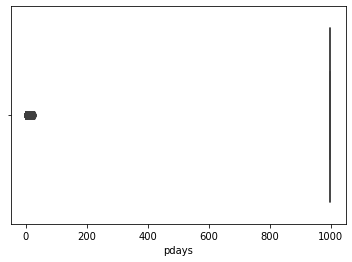

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


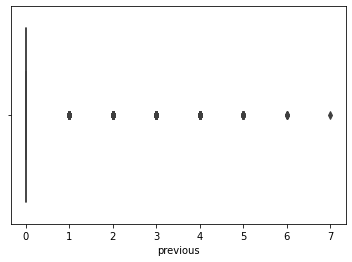

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


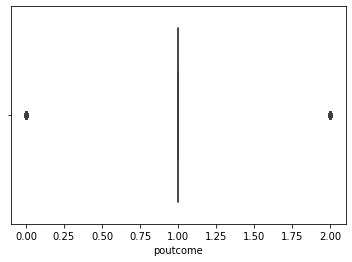

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


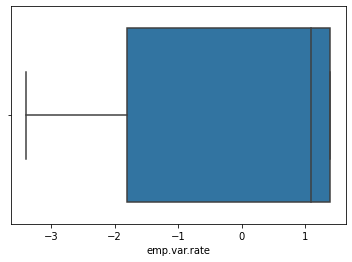

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


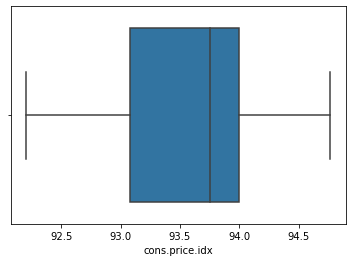

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


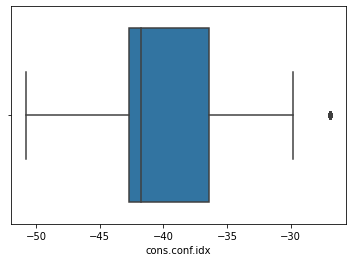

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


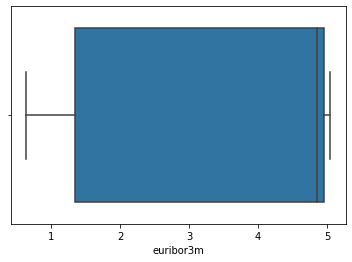

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


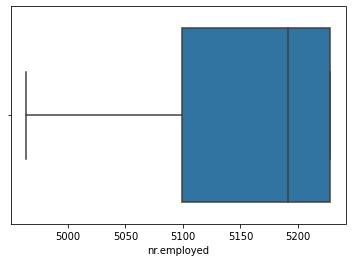

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


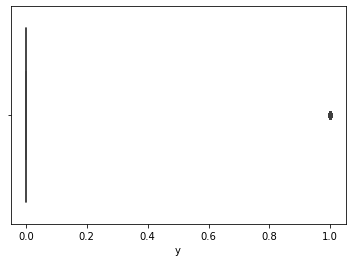

In [ ]:
for i in df_eda:
  sns.boxplot(df_eda[i])
  plt.show()

**numbers of outliers are present**

## Multivariate analysis on numerical data

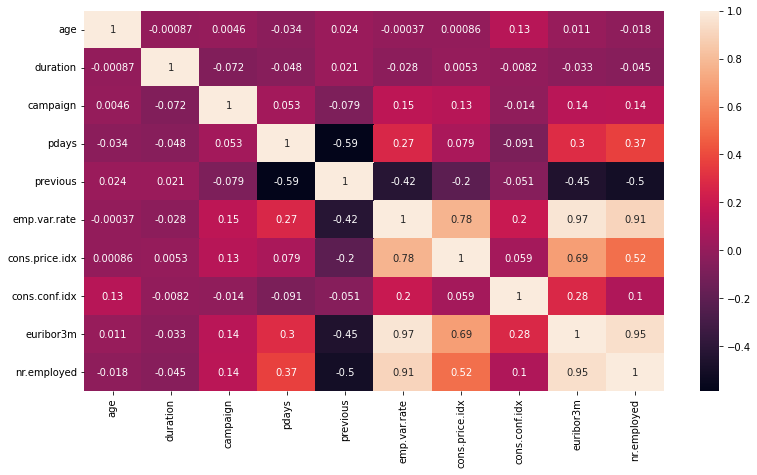

In [ ]:
plt.figure(figsize=(13, 7))
sns.heatmap(df.select_dtypes(['int64','float64']).corr(), annot=True)
plt.show()

The predictors have no collinearity with each other

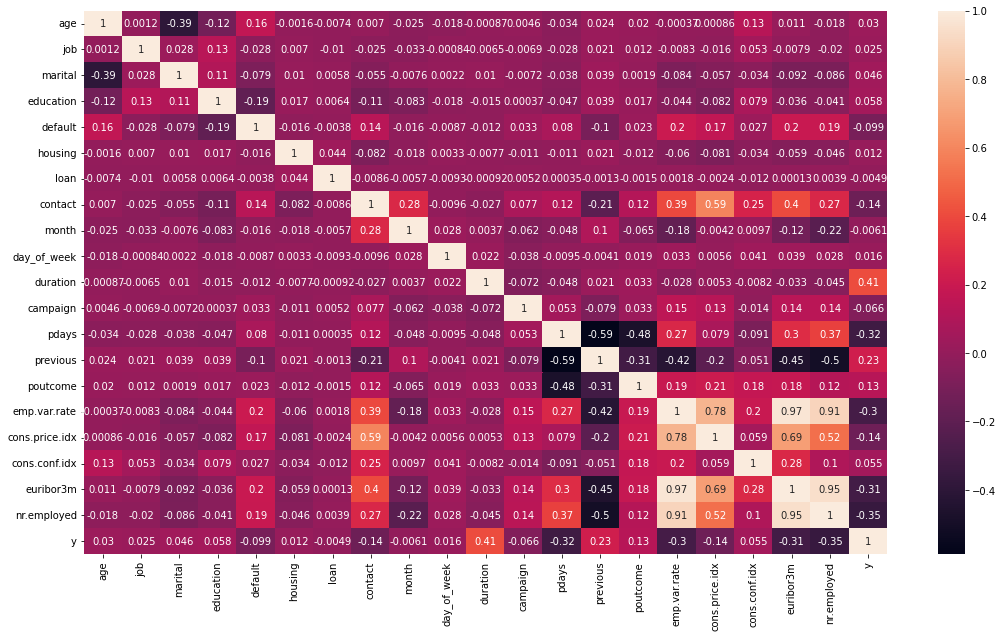

In [ ]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_eda.corr(), annot=True)
plt.show()

The inferences  from heatmap:

emp.var.rate has positive correlation with cons.price.idx

emp.var.rate has highly positive correlation with euribor3m

emp.var.rate has highly positive correlation with nr.employed

euribor3m has highly positive correlation with nr.employed

In [ ]:
df.select_dtypes(['int64','float64']).shape

(41188, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

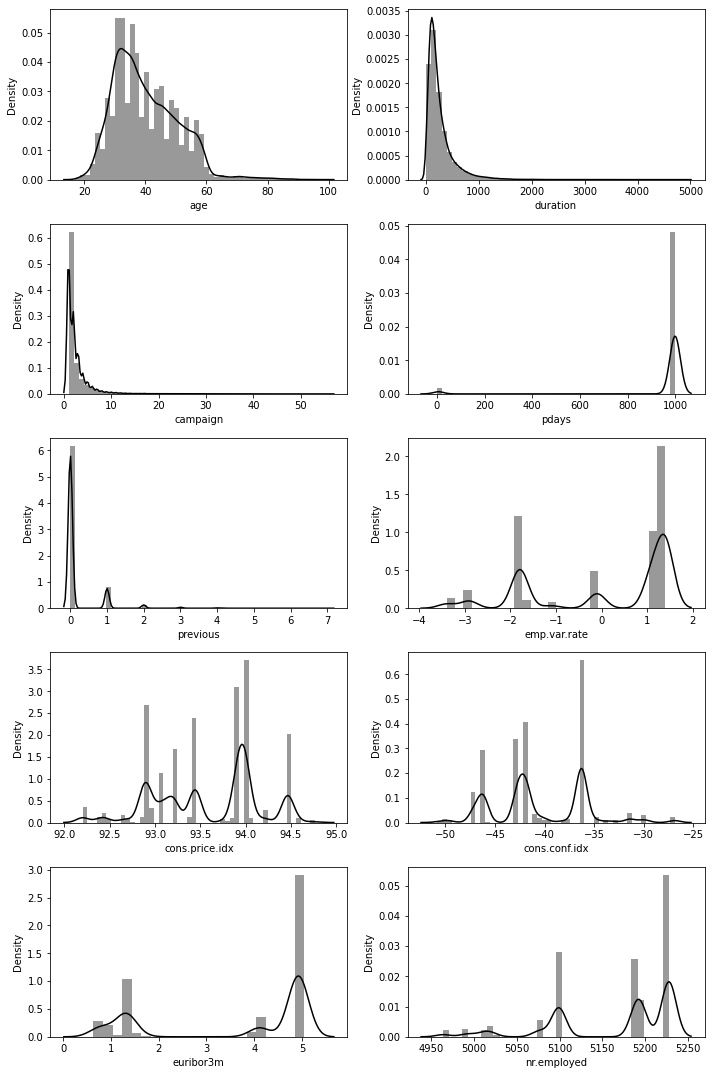

In [ ]:
plt.figure(figsize=(10,15))

for i, j in zip(df.select_dtypes(['int64','float64']), range(0, 10)):
    plt.subplot(5,2,j+1)
    sns.distplot(df[i], color='black')

plt.tight_layout()
plt.show()

# Data preprocessing

## Handling outliers using Power Transformation

Does transforming data remove outliers?

If the data are non-Gaussian and the outlier detection is carried out on the basis of the normalizing transformations, then the outliers be removed after data transformation.

**Pipeline(Standard-Scale, Yeo-Johnson)**

In [5]:
# define the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
transformation_pipeline = Pipeline(steps=[('s', scaler),('p', power)])

In [6]:
numerical_column = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'pdays',
              'cons.conf.idx', 'euribor3m', 'nr.employed']
X_yeo = df.loc[:, numerical_column]

In [7]:
X_yeo.shape

(41188, 10)

In [8]:
X_yeo.head(1)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,pdays,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,1.1,93.994,999,-36.4,4.857,5191.0


In [9]:
transformation_pipeline.fit(X_yeo)

Pipeline(steps=[('s', StandardScaler()), ('p', PowerTransformer())])

In [10]:
X_yeo = transformation_pipeline.transform(X_yeo)

In [11]:
X_yeo = DataFrame(X_yeo)
X_yeo.columns = numerical_column

In [12]:
X_yeo.shape

(41188, 10)

In [13]:
X_yeo.isnull().sum()

age               0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
pdays             0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [14]:
X_yeo.head(1)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,pdays,cons.conf.idx,euribor3m,nr.employed
0,1.419796,0.482341,-1.021824,-0.397706,0.554155,0.69971,0.195415,0.905413,0.701759,0.01835


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

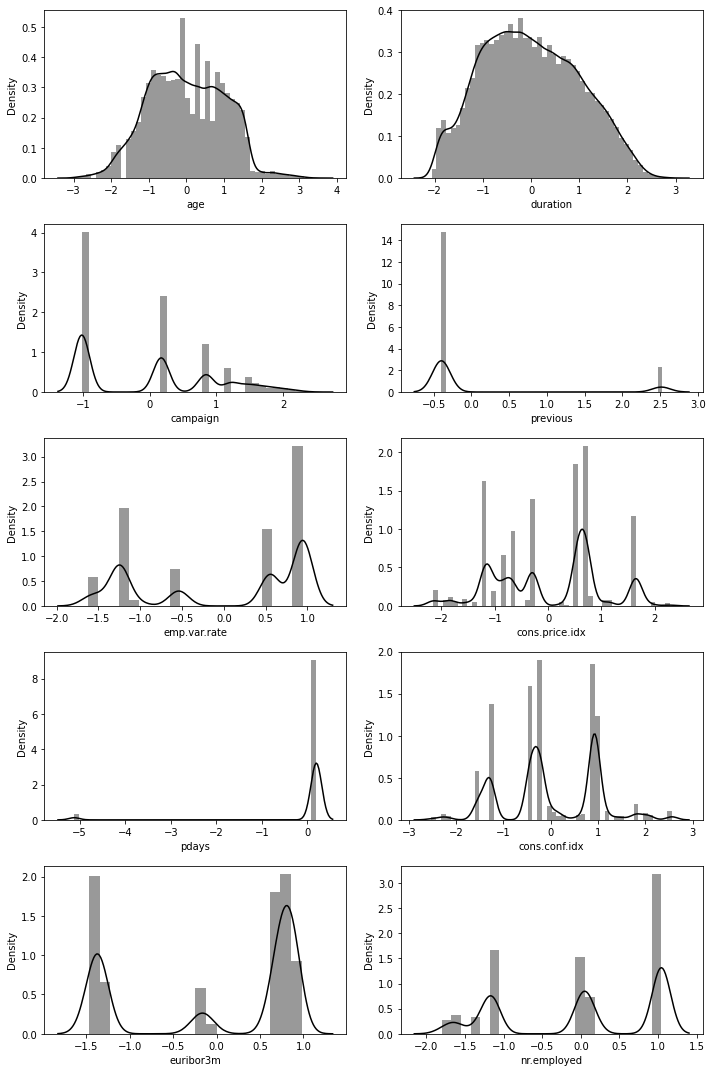

In [15]:
plt.figure(figsize=(10,15))

for i, j in zip(X_yeo, range(0, 10)):
    plt.subplot(5,2,j+1)
    sns.distplot(X_yeo[i], color='black')

plt.tight_layout()
plt.show()

There is some unknown values in job, marital, education and default. We are not going to change this unknown value. Because sometimes the client may have unknown data. 

So we train the model with unknown values so that if any client have unknown data then the model can perform with it.

## One-Hot Encoding

In [16]:
categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'contact', 'month', 'day_of_week']

In [17]:
# One Hot encoding
oneHot = ce.OneHotEncoder(cols=categorical_column, handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [18]:
df = oneHot.fit_transform(df)


In [19]:
df.shape

(41188, 64)

In [21]:
df.head(1)

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,261,1,999,0,1.0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no


**Check the shape for default_unknown**

In [22]:
df[(df.default_no==0.0) & (df.default_yes==0.0) & (df.default_unknown==1.0)].shape

(8597, 64)

**Make all unknown and nonexistent values to 0.0**

In [23]:
df_unknown = ['marital_unknown', 'job_unknown', 'education_unknown', 'poutcome_nonexistent',
                  'default_unknown', 'housing_unknown', 'loan_unknown']

for i in df_unknown:
  df[i] = pd.Series(np.full(41188, 0), index=df.index)

In [24]:
df[(df.default_no==0.0) & (df.default_yes==0.0) & (df.default_unknown==0.0)].shape

(8597, 64)

In [25]:
df.head(1)

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,261,1,999,0,0,0.0,0.0,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
OneHot_column = df.columns

In [27]:
len(OneHot_column)

64

**Now, replace all numerical column with transformed column (Power Transformation)**

In [28]:
numerical_column

['age',
 'duration',
 'campaign',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'pdays',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [29]:
df.drop(numerical_column, axis=1, inplace=True)

In [30]:
df.shape

(41188, 54)

In [31]:
df.head(1)

,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success,y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,no


In [32]:
df = df.join(X_yeo)

In [33]:
df.shape

(41188, 64)

In [34]:
df.head(1)

,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success,y,age,duration,campaign,previous,emp.var.rate,cons.price.idx,pdays,cons.conf.idx,euribor3m,nr.employed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,no,1.419796,0.482341,-1.021824,-0.397706,0.554155,0.69971,0.195415,0.905413,0.701759,0.01835


In [35]:
df = df.reindex(columns=OneHot_column)

In [36]:
df.head(1)

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.419796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0,0.0,1.0,0.0,0,1.0,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.482341,-1.021824,0.195415,-0.397706,0,0.0,0.0,0.554155,0.69971,0.905413,0.701759,0.01835,no


## Separate predictors and target

In [37]:
X = df.iloc[:, :-1]
y = df.y

In [38]:
OneHot_column_test = X.columns

## Load sample data for testing

In [55]:
df_bank_test = pd.read_csv('bank-additional.csv', sep=';')
df_bank_test.head(1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [56]:
X_test = df_bank_test.iloc[:, :-1]
y_test = df_bank_test.y

In [57]:
X_test.shape

(4119, 20)

### Handling outliers using Power Transformation

In [58]:
X_test_yeo = X_test.loc[:, numerical_column]

In [59]:
X_test_yeo.shape

(4119, 10)

In [60]:
X_test_yeo = transformation_pipeline.transform(X_test_yeo)

In [61]:
X_test_yeo = DataFrame(X_test_yeo)
X_test_yeo.columns = numerical_column

In [62]:
X_test_yeo.shape

(4119, 10)

### OneHot encoding

In [63]:
# One-Hot Encoding
X_test = oneHot.fit_transform(X_test)
X_test.shape

(4119, 63)

Check default unknown

In [64]:
X_test[(X_test.default_unknown == 1.0) & (X_test.default_yes == 0.0) & 
(X_test.default_no == 0.0)].shape

(803, 63)

Now replace all unknown and nonexistent values with 0.0

In [65]:
for i in df_unknown:
  X_test.loc[(X_test[i] == 1.0), i] = X_test[i].map({1.0:0.0})

Check again the default unknown

In [66]:
X_test[(X_test.default_unknown == 0.0) & (X_test.default_yes == 0.0) & 
(X_test.default_no == 0.0)].shape

(803, 63)

In [67]:
X_test.drop(numerical_column, axis=1, inplace=True)

In [68]:
X_test = X_test.join(X_test_yeo)

In [69]:
X_test = X_test.reindex(columns=OneHot_column_test)

In [70]:
X_test.head(1)

,age,job_housemaid,job_services,job_admin.,job_blue-collar,job_technician,job_retired,job_management,job_unemployed,job_self-employed,job_unknown,job_entrepreneur,job_student,marital_married,marital_single,marital_divorced,marital_unknown,education_basic.4y,education_high.school,education_basic.6y,education_basic.9y,education_professional.course,education_unknown,education_university.degree,education_illiterate,default_no,default_unknown,default_yes,housing_no,housing_yes,housing_unknown,loan_no,loan_yes,loan_unknown,contact_telephone,contact_cellular,month_may,month_jun,month_jul,month_aug,month_oct,month_nov,month_dec,month_mar,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,duration,campaign,pdays,previous,poutcome_nonexistent,poutcome_failure,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-1.033873,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.263579,0.171313,0.195415,-0.397706,0.0,0.0,0.0,-1.250349,-1.161003,-1.28969,-1.352445,-1.155917


In [71]:
X_test.shape

(4119, 63)

## Balance Dataset using Pipeline (Under-Sampling, SMOTE)

In [39]:
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [("o", oversample),("u",undersample)]

pipeline = Pipeline(steps=steps)

X_bal, y_bal = pipeline.fit_resample(X, y)

In [40]:
y_bal.value_counts()

yes    36548
no     36548
Name: y, dtype: int64

The dataset is balanced

# Train test split

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X_bal, y_bal, test_size=0.2, random_state=0)

# Model Train

## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier

Hyperparameter Tuning on KNN

In [79]:
start_time = time()
acc = np.empty(11)
train_acc = np.empty(11)

for i in range(1, 11):
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_val)
    acc[i] = accuracy_score(y_val, y_pred)
    y_pred_t = m.predict(X_train)
    train_acc[i] = accuracy_score(y_train, y_pred_t)
    print('\n=================== k:', i)
    print('Train:', train_acc[i])
    print('Validation:', acc[i])
    print('=====================')
    print(pd.crosstab(y_val, y_pred))
    print('\n')
    print(classification_report(y_val, y_pred))
    print('\n')

end_time = time()
print("Time taken : ", round((end_time - start_time)/60, 2), 'mins')


=================== k: 1
Train: 1.0
Test: 0.9473324213406292
col_0    no   yes
y                
no     6462   741
yes      29  7388


              precision    recall  f1-score   support

          no       1.00      0.90      0.94      7203
         yes       0.91      1.00      0.95      7417

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620




=================== k: 2
Train: 0.9983411998084685
Test: 0.9496580027359781
col_0    no   yes
y                
no     6556   647
yes      89  7328


              precision    recall  f1-score   support

          no       0.99      0.91      0.95      7203
         yes       0.92      0.99      0.95      7417

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620




=================== k: 3
Train: 0.9564265681647172
Tes

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_predict_val_knn = knn.predict(X_val)
y_predict_train_knn = knn.predict(X_train)

print('train accuracy:', accuracy_score(y_train, y_predict_train_knn))
print('Validation accuracy:', accuracy_score(y_val, y_predict_val_knn))
print()
print(pd.crosstab(y_val, y_predict_val_knn))
print()
print(classification_report(y_val, y_predict_val_knn))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_predict_val_knn = knn.predict(X_val)
y_predict_train_knn = knn.predict(X_train)

print('train accuracy:', accuracy_score(y_train, y_predict_train_knn))
print('Validation accuracy:', accuracy_score(y_val, y_predict_val_knn))
print()
print(pd.crosstab(y_val, y_predict_val_knn))
print()
print(classification_report(y_val, y_predict_val_knn))

train accuracy: 0.9361618441753882
Validation accuracy: 0.9170998632010944

col_0    no   yes
y                
no     6002  1201
yes      11  7406

              precision    recall  f1-score   support

          no       1.00      0.83      0.91      7203
         yes       0.86      1.00      0.92      7417

    accuracy                           0.92     14620
   macro avg       0.93      0.92      0.92     14620
weighted avg       0.93      0.92      0.92     14620



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# lets first create k folds of our dataset
kfold = KFold(n_splits=5, random_state=10, shuffle=True)

# now lets train and varify each model's cross validations score
cv_report = cross_val_score(knn, X_train, y=y_train, cv=kfold, scoring='accuracy')

print(cv_report)
print(cv_report.mean())

[0.90817373 0.91038906 0.91115861 0.90312099 0.91269773]
0.909108026101161


**Testing**

In [ ]:
y_predict_test_knn = knn.predict(X_test)

print('train accuracy:', accuracy_score(y_train, y_predict_train_knn))
print('test accuracy:', accuracy_score(y_test, y_predict_test_knn))
print()
print(pd.crosstab(y_test, y_predict_test_knn))
print()
print(classification_report(y_test, y_predict_test_knn))

train accuracy: 0.9361618441753882
test accuracy: 0.879582422918184

col_0    no  yes
y               
no     3172  496
yes       0  451

              precision    recall  f1-score   support

          no       1.00      0.86      0.93      3668
         yes       0.48      1.00      0.65       451

    accuracy                           0.88      4119
   macro avg       0.74      0.93      0.79      4119
weighted avg       0.94      0.88      0.90      4119



In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# lets first create k folds of our dataset
kfold = KFold(n_splits=5, random_state=10, shuffle=True)

# now lets train and varify each model's cross validations score
cv_report = cross_val_score(knn, X_test, y=y_test, cv=kfold, scoring='accuracy')

print(cv_report)
print(cv_report.mean())

[0.88592233 0.87864078 0.89927184 0.91019417 0.87606318]
0.8900184619377367


## SVM

In [73]:
svm = SVC(kernel='rbf', C=100, gamma=0.1, probability=True)
svm.fit(X_train, y_train)

y_predict_val = svm.predict(X_val)
y_predict_train = svm.predict(X_train)

print('train accuracy:', accuracy_score(y_train, y_predict_train))
print('Validation accuracy:', accuracy_score(y_val, y_predict_val))
print()
print(pd.crosstab(y_val, y_predict_val))
print()
print(classification_report(y_val, y_predict_val))

train accuracy: 0.9970073192420822
Validation accuracy: 0.9601231190150479

col_0    no   yes
y                
no     6711   492
yes      91  7326

              precision    recall  f1-score   support

          no       0.99      0.93      0.96      7203
         yes       0.94      0.99      0.96      7417

    accuracy                           0.96     14620
   macro avg       0.96      0.96      0.96     14620
weighted avg       0.96      0.96      0.96     14620



In [74]:
from sklearn.model_selection import KFold, cross_val_score
# lets first create k folds of our dataset
kfold = KFold(n_splits=5, random_state=10, shuffle=True)

# now lets train and varify each model's cross validations score
cv_report = cross_val_score(svm, X_train, y=y_train, cv=kfold, scoring='accuracy')

print(cv_report)
print(cv_report.mean())

[0.95502736 0.95425395 0.9535699  0.95203078 0.95442497]
0.9538613932901278


# Testing on SVM Model

In [75]:
y_predict_test = svm.predict(X_test)

print('train accuracy:', accuracy_score(y_train, y_predict_train))
print('test accuracy:', accuracy_score(y_test, y_predict_test))
print()
print(pd.crosstab(y_test, y_predict_test))
print()
print(classification_report(y_test, y_predict_test))

train accuracy: 0.9970073192420822
test accuracy: 0.9803350327749454

col_0    no  yes
y               
no     3596   72
yes       9  442

              precision    recall  f1-score   support

          no       1.00      0.98      0.99      3668
         yes       0.86      0.98      0.92       451

    accuracy                           0.98      4119
   macro avg       0.93      0.98      0.95      4119
weighted avg       0.98      0.98      0.98      4119



In [77]:
from sklearn.model_selection import KFold, cross_val_score
# lets first create k folds of our dataset
kfold = KFold(n_splits=5, random_state=0, shuffle=True)

# now lets train and varify each model's cross validations score
cv_report = cross_val_score(svm, X_test, y=y_test, cv=kfold, scoring='accuracy')

print(cv_report)
print(cv_report.mean())

[0.88228155 0.87014563 0.87378641 0.89805825 0.89671932]
0.8841982328445539


# ROC Curve

In [ ]:
proba = svm.predict_proba(X_test)[:, 1:]

"If you want SVM to output probabilities, you need to specify **probability=True** when you are instantiating the SVC class."

"That is because logistic regression by default outputs probabilities. SVM's default output is binary (-1, 1) which is given by the design of the algorithm itself (finding the best separating hyperplane and either the target is on one side or the other)."

In [ ]:
y_true = y_test.copy()

y_true = le.fit_transform(y_true)

y_true

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
fpr, tpr, threshold = roc_curve(y_true, proba)

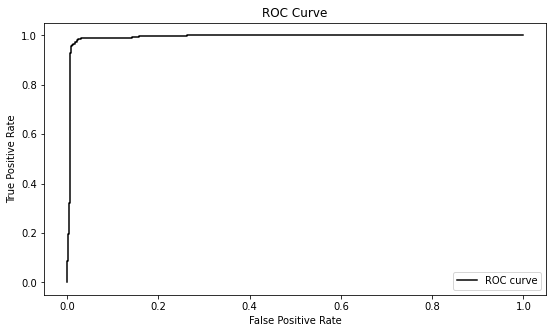

In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(fpr, tpr, color='black', label='ROC curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_true, proba)

0.9923228884316205

Algorithm: **SVM**

Training accuracy: **99.7%**

Valitaion accuracy: **96%**

Testing accuracy: **97.9%**

AUC score: **0.992**